In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
chicago = pd.read_csv("chicago_2016.csv", parse_dates=["start_time","end_time"])

In [4]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber


In [7]:
chicago['driving_time'] = chicago['end_time']-chicago['start_time'] 


In [8]:
def get_weekday (ts):
    return ts.weekday()
chicago["Weekday"]=chicago["start_time"].apply(lambda x: get_weekday (x))
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,Weekday
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,3
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,3
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00,3
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber,0 days 00:18:00,3
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber,0 days 00:04:00,3


In [21]:
montag = chicago[chicago["Weekday"]==0].size
dienstag = chicago[chicago["Weekday"]==1].size
mittwoch = chicago[chicago["Weekday"]==2].size
donnerstag = chicago[chicago["Weekday"]==3].size
freitag = chicago[chicago["Weekday"]==4].size
samstag = chicago[chicago["Weekday"]==5].size
sonntag = chicago[chicago["Weekday"]==6].size

print(montag)
print(dienstag)
print(mittwoch)
print(donnerstag)
print(freitag)
print(samstag)
print(sonntag)

weekdaysize = pd.DataFrame({'Weekday': ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 'Rides': [montag, dienstag, mittwoch, donnerstag, freitag, samstag, sonntag]})

5521810
5417100
4797600
5022980
5292830
5021760
4879750


ValueError: shape mismatch: objects cannot be broadcast to a single shape

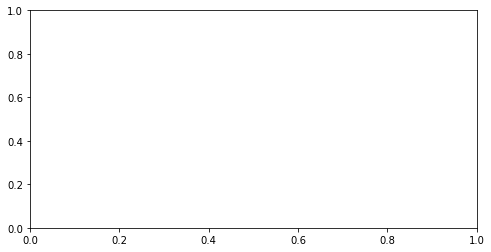

In [22]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(weekdaysize[Weekday], weekdaysize[Rides])
ax.set_xlabel("weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days")

plt.show()

In [12]:
##Summe an Ausleihzeiten -> Durchschnitt, Durchschnitt und Summe an Tagen bzw Tageszeiten
sum = 0
for i in range (chicago.size):
    sum = sum + chicago[i].driving_time
print(sum)

KeyError: 0